In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import os

import seaborn as sns

In [ ]:
datasetIndex = 2 

if datasetIndex == 1:
    dataSetPath = r"E:\pythonProject\HITEC_Codes\1_DataSets\life_insurance_data.csv"
elif datasetIndex == 2:
    dataSetPath = r"E:\pythonProject\HITEC_Codes\1_DataSets\googleplaystore.csv"
elif datasetIndex == 3:
    dataSetPath = r"E:\pythonProject\HITEC_Codes\1_DataSets\framingham_Heart_Disease_Dataset.csv"

dataset = pd.read_csv(dataSetPath)
dataset.head()

print(f"Dataset Columns: {dataset.columns.to_list()}")
print("****************************")
print(f"Dataset Shape: {dataset.shape}")
print("****************************")

totalNumberOfRowInActualDataset = len(dataset)
print(f"Total Rows in dataset File: {totalNumberOfRowInActualDataset}")

Dataset Columns: ['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']
****************************
Dataset Shape: (10841, 13)
****************************
Total Rows in dataset File: 10841


In [3]:
dataset.drop_duplicates(inplace=True)
print(f"Dataset Shape after removing duplcates: {dataset.shape}")
print("****************************")

numberOfRowAfterRemovingDuplicates = len(dataset)
print(f"Remaining Rows in Dataset: {numberOfRowAfterRemovingDuplicates}")

print("****************************")
print(f"Total Duplicates: {(totalNumberOfRowInActualDataset - numberOfRowAfterRemovingDuplicates)}")

Dataset Shape after removing duplcates: (10358, 13)
****************************
Remaining Rows in Dataset: 10358
****************************
Total Duplicates: 483


In [4]:
# Step 2: Handle missing values (remove rows with missing values)
cleanedDataset = dataset.dropna()
numberOfRowAfterRemovingNullValues = len(cleanedDataset)
print(f"Remaining Rows in Dataset: {numberOfRowAfterRemovingNullValues}")

print("****************************")
print(f"Removed Number of rows containing Null Values: {( numberOfRowAfterRemovingDuplicates - numberOfRowAfterRemovingNullValues)}")

Remaining Rows in Dataset: 8886
****************************
Removed Number of rows containing Null Values: 1472


In [5]:
# Save cleaned data
cleanedDataset.to_csv(f'cleaned_Dataset_with_Categorical_Features_Dataset_{datasetIndex}.csv', index=False)

In [6]:
# Splitting : Select categorical features (object, category, or boolean types)
df_categorical = cleanedDataset.select_dtypes(include=['object', 'category', 'bool', 'datetime'])

# Splitting : Select continuous (numerical) features (int64, float64)
df_numerical = cleanedDataset.select_dtypes(include=['int64', 'int32', 'float64', 'float32'])




In [7]:
# Display the Numerical or Continuous Features DataFrame
print("\nNumerical DataFrame:")
print(df_numerical.head())
# Save cleaned data
df_numerical.to_csv(f'Continuous_Features_only_of_Dataset_{datasetIndex}.csv', index=False)



Numerical DataFrame:
   Rating
0     4.1
1     3.9
2     4.7
3     4.5
4     4.3


In [8]:
for x in df_numerical.columns:
  df_numerical[x] = df_numerical[x].astype(int)


print(df_numerical.head())

   Rating
0       4
1       3
2       4
3       4
4       4


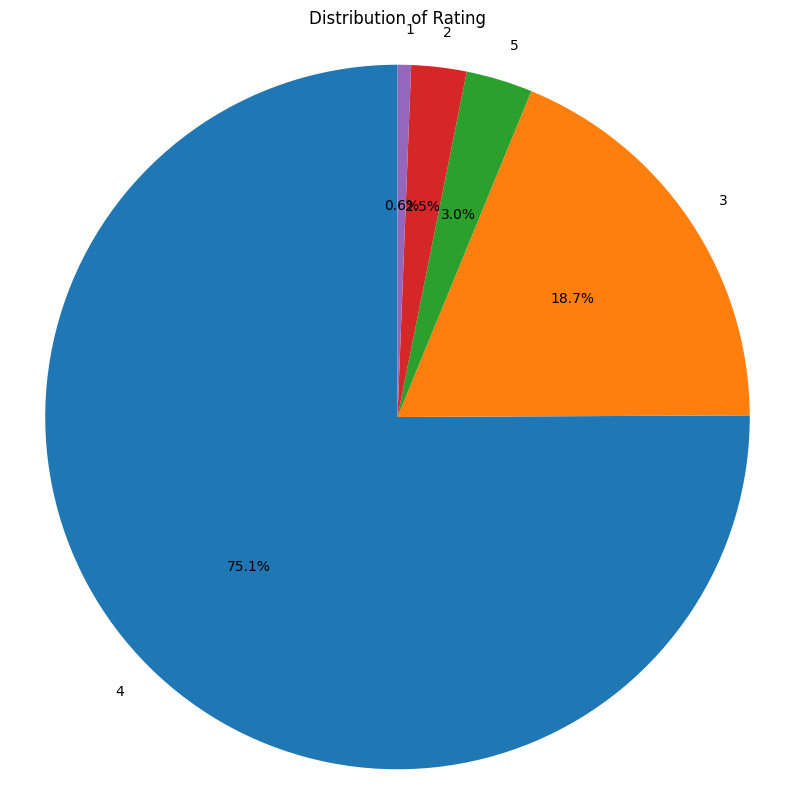

In [9]:
# Ploting a Pie Chart of Rating values of Application
value_counts = df_numerical['Rating'].value_counts()

plt.figure(figsize=(10,10)) 
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')

plt.title(f"Distribution of {df_numerical['Rating'].name}")

plt.show()

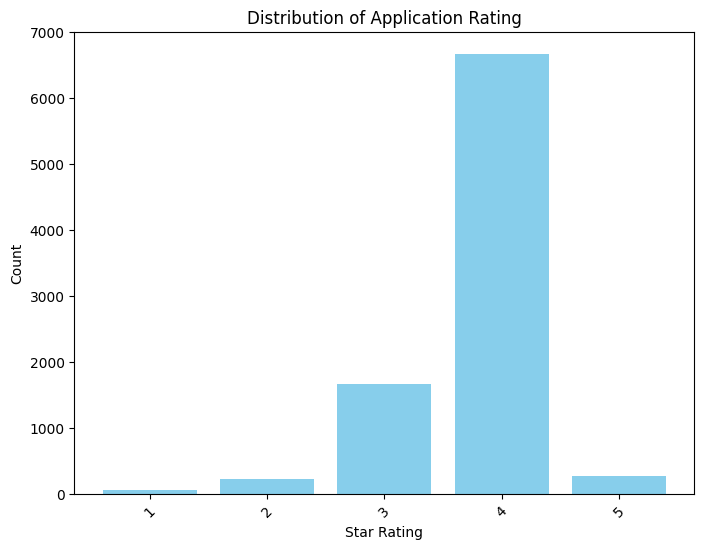

In [10]:
plt.figure(figsize=(8,6))  # Optional: Set figure size
plt.bar(value_counts.index, value_counts.values, color='skyblue')

# Step 4: Add labels and title
plt.xlabel('Star Rating')
plt.ylabel('Count')
plt.title(f"Distribution of Application {df_numerical['Rating'].name}")

# Step 5: Show the bar plot
plt.xticks(rotation=45)  # Optional: Rotate x-axis labels if necessary
plt.show()

In [11]:
# Display the Categorical Features DataFrame
print("Categorical DataFrame:")
print(df_categorical.head())
# Save cleaned data
df_categorical.to_csv(f'Categorical_Features_only_of_Dataset_{datasetIndex}.csv', index=False)

Categorical DataFrame:
                                                 App        Category Reviews  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     159   
1                                Coloring book moana  ART_AND_DESIGN     967   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN   87510   
3                              Sketch - Draw & Paint  ART_AND_DESIGN  215644   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     967   

   Size     Installs  Type Price Content Rating                     Genres  \
0   19M      10,000+  Free     0       Everyone               Art & Design   
1   14M     500,000+  Free     0       Everyone  Art & Design;Pretend Play   
2  8.7M   5,000,000+  Free     0       Everyone               Art & Design   
3   25M  50,000,000+  Free     0           Teen               Art & Design   
4  2.8M     100,000+  Free     0       Everyone    Art & Design;Creativity   

       Last Updated        

In [12]:
df_combined = pd.concat([df_categorical, df_numerical], axis=1, ignore_index=True)

print(df_combined.head())
# Save cleaned data
df_combined.to_csv(f'Combining_Two_dataFrames_Dataset_{datasetIndex}.csv', index=False)

                                                  0               1       2   \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     159   
1                                Coloring book moana  ART_AND_DESIGN     967   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN   87510   
3                              Sketch - Draw & Paint  ART_AND_DESIGN  215644   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     967   

     3            4     5  6         7                          8   \
0   19M      10,000+  Free  0  Everyone               Art & Design   
1   14M     500,000+  Free  0  Everyone  Art & Design;Pretend Play   
2  8.7M   5,000,000+  Free  0  Everyone               Art & Design   
3   25M  50,000,000+  Free  0      Teen               Art & Design   
4  2.8M     100,000+  Free  0  Everyone    Art & Design;Creativity   

                 9                   10            11  12  
0   January 7, 2018               1.0.

In [13]:
# Step 4: Encode categorical variables (using label encoding as an example)
for col in df_categorical.select_dtypes(include=['object']).columns:
    df_categorical[col] = df_categorical[col].astype('category').cat.codes

  

In [ ]:
for x in df_categorical.columns:
  df_categorical[x] = df_categorical[x].astype(float)

print(df_categorical.head())

In [ ]:
correlation_matrix = df_categorical.corr()

correlation_values = correlation_matrix.abs()
sorted_correlation = correlation_values.unstack().sort_values(ascending=False)
sorted_correlation = sorted_correlation[sorted_correlation != 1.0]
 
plt.figure(figsize=(10, 8)) 
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
# Set the title of the plot
plt.title('Correlation Heatmap ' ,fontsize=16, fontweight='bold')
plt.show()
plt.close()




